<a href="https://colab.research.google.com/github/Mr0Ctrl/insurance_AI_project/blob/main/insurance(AI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

csv_path = "/content/insurance.csv"
rawDf = pd.read_csv(csv_path)
df = rawDf.copy()

#Exploratory Data Analysis


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB




---


**age:** age of primary beneficiary

**sex:** insurance contractor gender, female, male

**bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children:** Number of children covered by health insurance / Number of dependents

**smoker:** Smoking

**region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges:** Individual medical costs billed by health insurance


---



In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---


sex, region, and smoker should be categorical data.

---



In [6]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [7]:
catColumn = ["sex","region","smoker"]
df[catColumn] = df[catColumn].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB




---


**After this stage, we can examine the relationship between the columns through visualization.**

---




array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

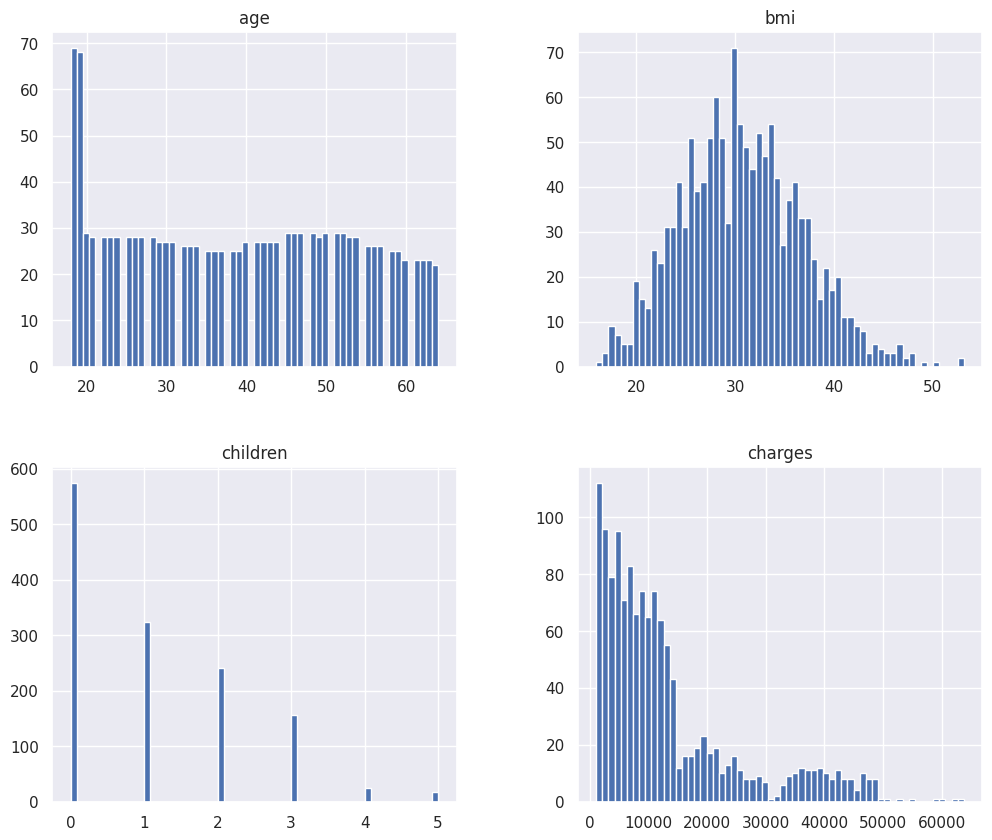

In [9]:
df.hist(bins=60, figsize=(12, 10))

[Text(0.5, 1.0, 'Distribution of Bmi')]

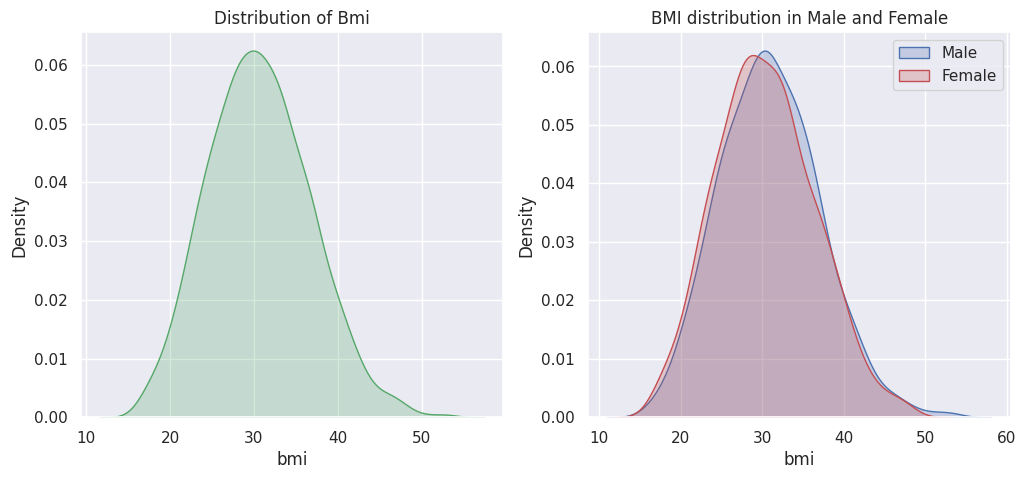

In [10]:
fig, ax = plt.subplots(1, 2,figsize=(12, 5))
sns.kdeplot(df[df.sex == 'male']['bmi'],
            color='b', label='Male', fill=True, ax=ax[1])
sns.kdeplot(df[df.sex == 'female']['bmi'],
            color='r', label='Female', fill=True, ax=ax[1]).set(title='BMI distribution in Male and Female')
ax[1].legend()

sns.kdeplot(df['bmi'],fill=True,ax= ax[0], color = 'g').set(title='Distribution of Bmi')






Normal distribution is observed in BMI and there is not much difference between male and female distributions.

---
*bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, **ideally** 18.5 to 24.9*

According to the deduction I made from the graphs, the common distribution of BMI is between 25 and 35 and the median is 30.These stats are outside the ideal range given by the data source.

---





<Axes: ylabel='children'>

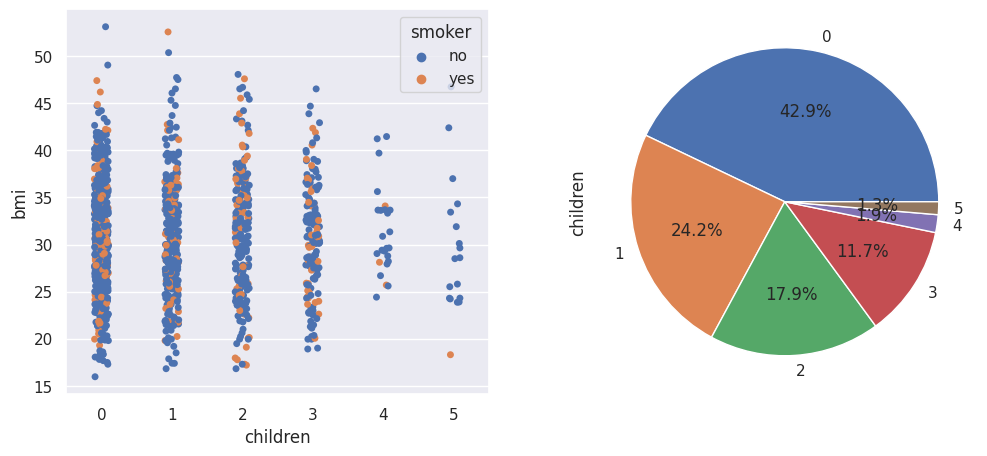

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.stripplot(x='children', y='bmi', data=df, ax= ax[0],hue = 'smoker')#.set(title = 'Relationship between “bmi” and “children”')
df['children'].value_counts().plot.pie(autopct='%1.1f%%')

[Text(0.5, 1.0, 'Relationship between “charges”, “age” and "smoker"')]

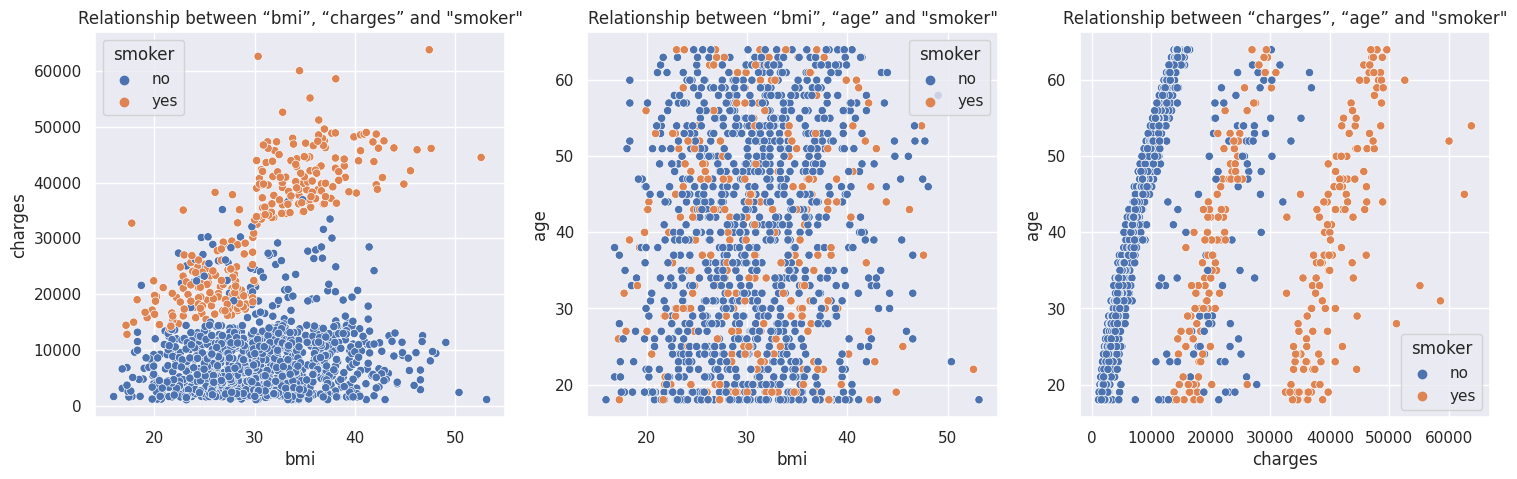

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(x = 'bmi',y = 'charges', data = df, hue = 'smoker',ax = ax[0]).set(title = 'Relationship between “bmi”, “charges” and "smoker"')
sns.scatterplot(x = 'bmi',y = 'age', data = df, hue = 'smoker',ax = ax[1]).set(title = 'Relationship between “bmi”, “age” and "smoker"')
sns.scatterplot(x = 'charges',y = 'age', data = df, hue = 'smoker',ax = ax[2]).set(title = 'Relationship between “charges”, “age” and "smoker"')



It is observed that age and charge also have a relationship.

In addition we can see that there is a correlation between the bmi and charges of smokers.

---



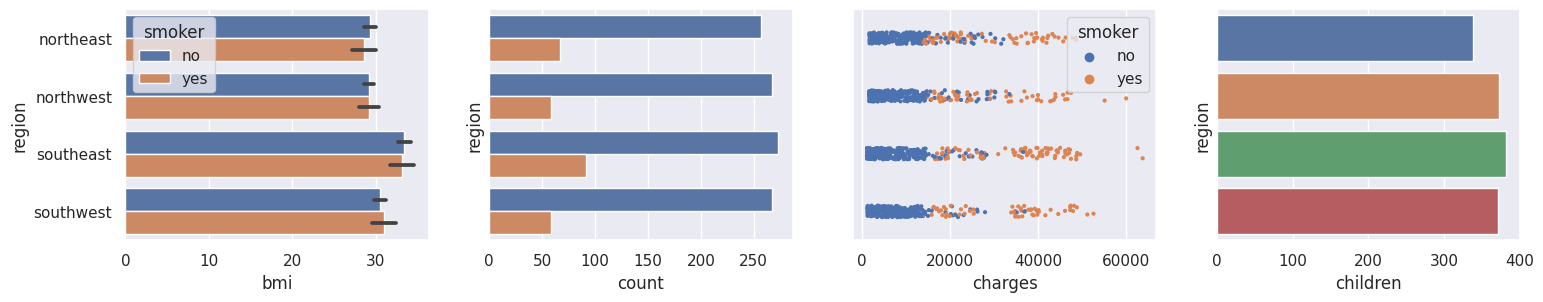

In [13]:
fig ,ax =plt.subplots(1,4, figsize =(18,3), sharey=True,)

sns.barplot(y= 'region',x='bmi', hue='smoker', data= df, ax = ax[0])
sns.countplot(data= df,y='region',hue= 'smoker', ax =ax[1])
sns.stripplot(x='charges', y='region', data=df, ax= ax[2],hue = 'smoker', size = 3)
sns.barplot(y='region', x='children', data=df, estimator=sum,errorbar=None)
ax[1].legend().set_visible(False)

The region with the most children is Southeast.

---



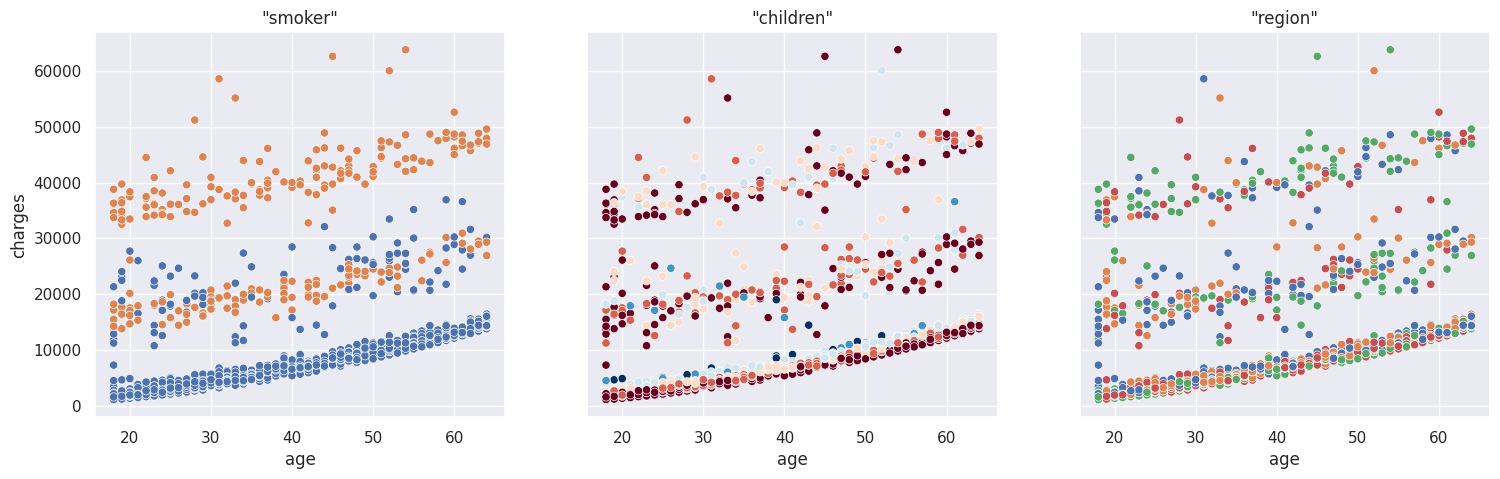

In [14]:
fig, ax = plt.subplots(1,3, figsize=(18,5),sharey=True)

sns.scatterplot(y = 'charges',x = 'age', data = df, hue = 'smoker',ax = ax[0]).set(title='"smoker"')

sns.scatterplot(y = 'charges',x = 'age', data = df, hue = 'children',ax = ax[1] ,palette='RdBu').set(title='"children"')

sns.scatterplot(y = 'charges',x = 'age', data = df, hue = 'region',ax = ax[2]).set(title='"region"')

#ax[1].figure.colorbar(sm)


ax[0].legend().set_visible(False)
ax[1].legend().set_visible(False)
ax[2].legend().set_visible(False)



---



In [15]:
age_bins = [18,30,45,60,90]
age_labels = [ '18-30', '30-45', '45-60', '60+']

df['age_group'] = pd.cut(df['age'],bins = age_bins, labels= age_labels, right=False )

bmi_bins = [0,18.5 ,24.9,29.9,float('inf')]
bmi_labels = ['underweight', 'normal weight', 'overweight', 'obese']

df['bmi_group'] = pd.cut(df['bmi'],bins = bmi_bins, labels= bmi_labels, right=False )

df.head(10)

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,18-30,overweight
1,18,male,33.770,1,no,southeast,1725.55230,18-30,obese
2,28,male,33.000,3,no,southeast,4449.46200,18-30,obese
3,33,male,22.705,0,no,northwest,21984.47061,30-45,normal weight
4,32,male,28.880,0,no,northwest,3866.85520,30-45,overweight
5,31,female,25.740,0,no,southeast,3756.62160,30-45,overweight
6,46,female,33.440,1,no,southeast,8240.58960,45-60,obese
7,37,female,27.740,3,no,northwest,7281.50560,30-45,overweight
8,37,male,29.830,2,no,northeast,6406.41070,30-45,overweight
9,60,female,25.840,0,no,northwest,28923.13692,60+,overweight


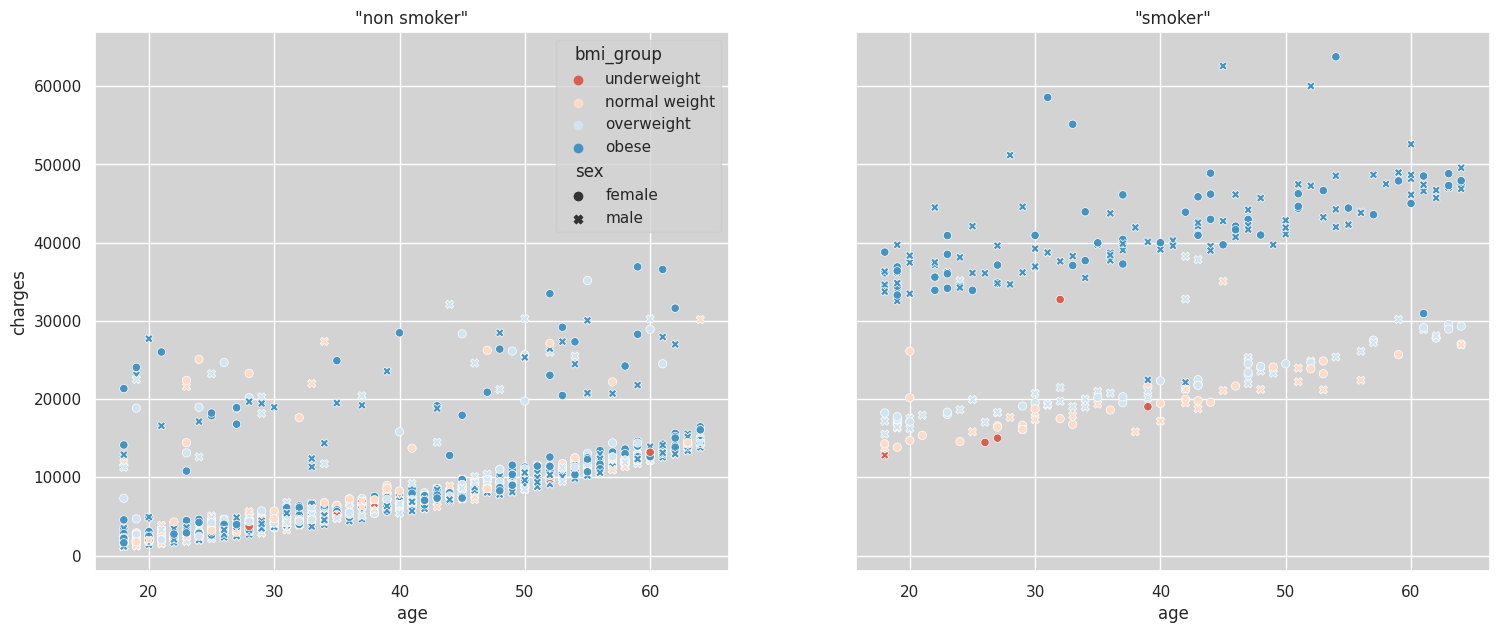

In [16]:
sns.set(rc={'axes.facecolor':'lightgray', 'figure.facecolor':'w'})
fig, ax = plt.subplots(1,2, figsize=(18,7),sharey=True)

sns.scatterplot(y = 'charges',x = 'age', data = df[df.smoker == 'no'], hue = 'bmi_group',ax = ax[0], palette= 'RdBu', style = 'sex').set(title='"non smoker"')

sns.scatterplot(y = 'charges',x = 'age', data = df[df.smoker == 'yes'], hue = 'bmi_group',ax = ax[1] ,palette='RdBu', style = 'sex').set(title='"smoker"')


#ax[1].figure.colorbar(sm)

ax[1].legend().set_visible(False)
#ax[0].legend().set_visible(False)

Using this graph, we see that obese and non-obese smokers have different charge values. However, such a distinction is not observed in non-smokers.

---



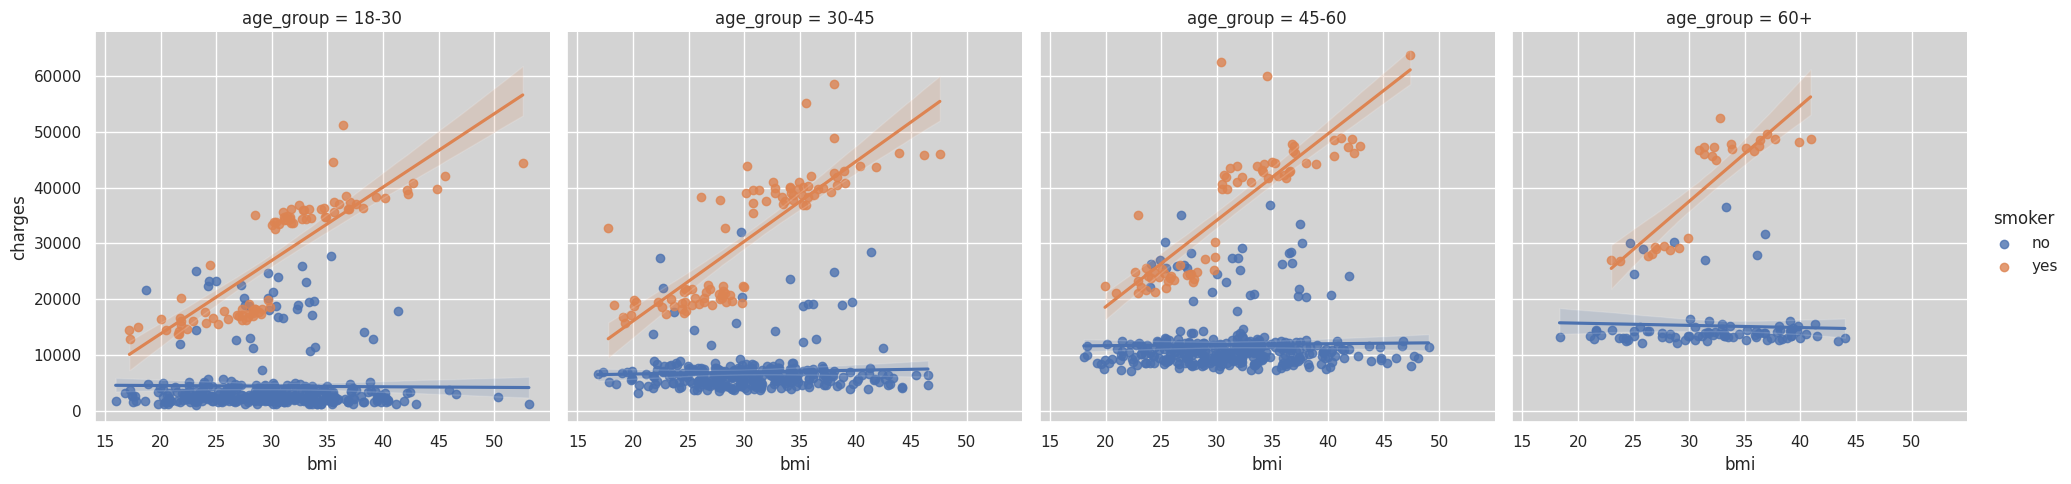

In [17]:
sns.lmplot(x="bmi", y="charges", hue="smoker", col ='age_group', data= df )

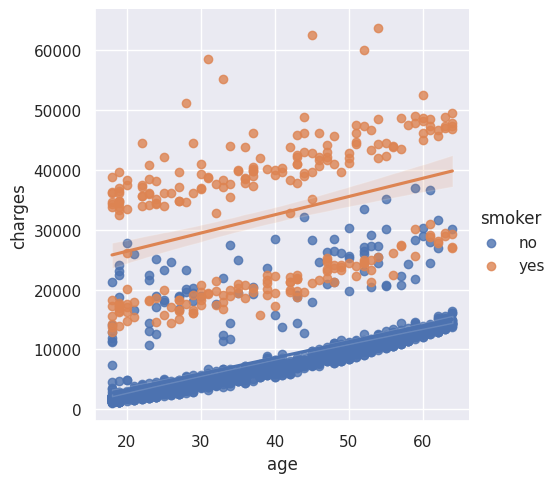

In [18]:
sns.set()
sns.lmplot(x="age", y="charges", hue="smoker", data= df )

# Data Preprosessing

Importing machine learning libraries


In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split

In [20]:
preSet_1 = rawDf
preSet_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
numAttr = ['age', 'bmi', 'children']
catAttr = preSet_1.select_dtypes(include = ['object']).columns

print(numAttr)
print(catAttr)

['age', 'bmi', 'children']
Index(['sex', 'smoker', 'region'], dtype='object')


In [22]:
class Selector (BaseEstimator, TransformerMixin):
  def __init__ (self, attrNames):
    self.attrNames = attrNames

  def fit (self, X, y = None):
    return self

  def transform (self, X, y = None):
    return X[self.attrNames]

In [23]:
class AttrCreate (BaseEstimator, TransformerMixin):
  def __init__(self) -> None :
    return None
  def fit (self, X, y= None):
    return self
  def transform(self, X) -> pd.DataFrame:
    xCopy = X.copy()

    xCopy['ageGroup'] =  pd.cut(X['age'],bins = age_bins, labels= age_labels, right=False )

    xCopy['bmiGroup'] = pd.cut(X['bmi'],bins = bmi_bins, labels= bmi_labels, right=False )

    catCols = xCopy.select_dtypes(include = ['object','category']).columns

    return xCopy[catCols]

In [24]:
numPipeline = Pipeline([
    ('select', Selector(numAttr)),
    ('scale', StandardScaler())
])

catPipeline = Pipeline([
    ('select', Selector(list(catAttr) + ['age','bmi'])),
    ('attrCreate', AttrCreate()),
    ('encoder', OneHotEncoder(sparse_output=False))
])

mainPipeline = FeatureUnion( transformer_list=[
    ('numPipeline', numPipeline),
    ('catPipeline', catPipeline)
] )

**I create a pipeline so that I can handle the preprocess job in a single method if needed.**


---



In [25]:
preSet_1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500




---

I divide the data as test and training

In [26]:
trainSet, testSet = train_test_split(preSet_1, test_size=0.2, random_state=42)
trainSet

,age,sex,bmi,children,smoker,region,charges
560,46,female,19.950,2,no,northwest,9193.83850
1285,47,female,24.320,0,no,northeast,8534.67180
1142,52,female,24.860,0,no,southeast,27117.99378
969,39,female,34.320,5,no,southeast,8596.82780
486,54,female,21.470,3,no,northwest,12475.35130
...,...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast,4561.18850
1130,39,female,23.870,5,no,southeast,8582.30230
1294,58,male,25.175,0,no,northeast,11931.12525
860,37,female,47.600,2,yes,southwest,46113.51100


In [27]:
train_F = trainSet.drop("charges", axis=1)
train_L = trainSet["charges"].copy()

test_F = testSet.drop("charges", axis=1)
test_L = testSet["charges"].copy()

After separating the labels and fetures, I easily convert the data into a numeric array using the pipeline I prepared before.

In [28]:
train_FP = mainPipeline.fit_transform(train_F)
test_FP = mainPipeline.fit_transform(test_F)
train_FP

array([[ 0.47222651, -1.75652513,  0.73433626, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54331294, -1.03308239, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8987451 , -0.94368672, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211, ...,  0.        ,
         1.        ,  0.        ],
       [-0.16755139,  2.82086429,  0.73433626, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.1120044 , -0.10932713, -0.91119211, ...,  1.        ,
         0.        ,  0.        ]])

In [29]:
train_L

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

**My dataset is now available for use in AI models**

---



#  Model Selection

In [30]:
from sklearn.metrics import mean_squared_error , r2_score

from sklearn.linear_model import LinearRegression , ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


I'm testing the rmse value of a few models I see fit to choose the best model.

---



**Linear Regression**




In [31]:
linReg = LinearRegression()
linReg.fit(train_FP,train_L)
linReg.score(test_FP,test_L)

0.7832104168952119

In [32]:
some_F = train_F.iloc[:5]
some_L = train_L.iloc[:5]
some_FP = mainPipeline.transform(some_F)

print("Predictions:\t", list(linReg.predict(some_FP)))
print("Labels: \t", list(some_L))

Predictions:	 [7976.72882935013, 7997.169858886611, 8772.3107023263, 11660.003021746297, 10733.863010600537]
Labels: 	 [9193.8385, 8534.6718, 27117.99378, 8596.8278, 12475.3513]


In [33]:
somePredict = linReg.predict(test_FP)
linMSE = mean_squared_error(test_L, somePredict)
linRMSE = np.sqrt(linMSE)
linRMSE

5801.405672563225

<Axes: xlabel='age', ylabel='charges'>

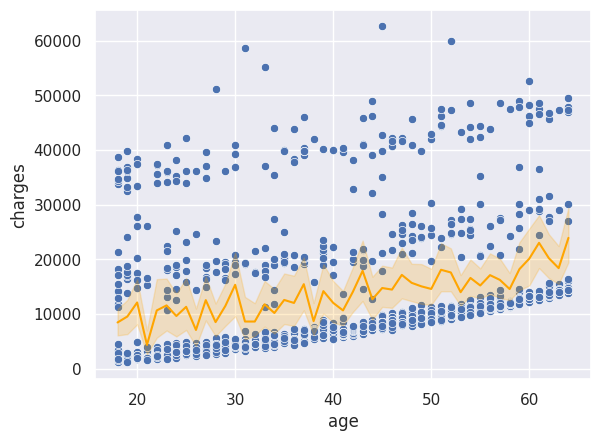

In [34]:
sns.scatterplot(x = train_F['age'], y = train_L)
sns.lineplot(x = train_F['age'], y = linReg.predict(train_FP), color = 'orange')

**ElasticNet Regression**

In [35]:
elasticNet = ElasticNet(random_state=42)
elasticNet.fit(train_FP,train_L)
elasticNet.score(test_FP,test_L)

0.5222165238772376

In [36]:
somePredict = elasticNet.predict(test_FP)
elasticNetMSE = mean_squared_error(test_L, somePredict)
elasticNetRMSE = np.sqrt(elasticNetMSE)
elasticNetRMSE

8612.50710280049

**Decision Tree**

In [37]:
treeReg = DecisionTreeRegressor(random_state=32)
treeReg.fit(train_FP,train_L)
treeReg.score(test_FP,test_L)

0.7873292151980795

In [38]:
somePredict = treeReg.predict(test_FP)
treeMSE = mean_squared_error(test_L, somePredict)
treeRMSE = np.sqrt(treeMSE)
treeRMSE

5746.030766177474

**Random Forest**

In [39]:
forestReg = RandomForestRegressor(random_state=32)
forestReg.fit(train_FP,train_L)
forestReg.score(test_FP,test_L)

0.8639245154885715

In [40]:
somePredict = forestReg.predict(test_FP)
forestMSE = mean_squared_error(test_L, somePredict)
forestRMSE = np.sqrt(forestMSE)
forestRMSE

4596.253513191777

Random forest works better than others by a small margin. Elastic Net has the highest rmse value.

---



# Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
fullSet_F = preSet_1.drop("charges", axis=1)
fullSet_L = preSet_1["charges"].copy()

fullSet_FP = mainPipeline.transform(fullSet_F)

In [43]:
def showScore(scores):
  print(scores)
  print('Mean : ', scores.mean())

I will review the models one more time using cross validation

---



**Random Forest**

In [44]:
scores = cross_val_score(forestReg, fullSet_FP, fullSet_L, scoring='neg_mean_squared_error')
forestScores = np.sqrt(-scores)
showScore(forestScores)

[4770.26521896 5428.40106691 4357.01187076 5026.67480401 4681.57098087]
Mean :  4852.784788301103


**Decision Tree**

In [45]:
scores = cross_val_score(treeReg, fullSet_FP, fullSet_L, scoring='neg_mean_squared_error')
treeScores = np.sqrt(-scores)
showScore(treeScores)

[6002.51635761 7248.53651757 6079.68946719 6397.62517191 6356.23640254]
Mean :  6416.920783362251


**Linear Regresion**

In [46]:
scores = cross_val_score(linReg, fullSet_FP, fullSet_L, scoring='neg_mean_squared_error')
linScores = np.sqrt(-scores)
showScore(linScores)

[6035.43219914 6115.34293732 5755.20040871 6206.17831215 5986.35426159]
Mean :  6019.701623780582


**Elastic Net**

In [47]:
scores = cross_val_score(elasticNet, fullSet_FP, fullSet_L, scoring='neg_mean_squared_error')
eNetScores = np.sqrt(-scores)
showScore(eNetScores)

[8647.86236419 7971.43357023 8581.93378002 8459.78288722 8713.05893152]
Mean :  8474.814306635908




---

Again, random forest gave the best value with the rmse score of 4852,784.

# Hyper-parameter Optimization

**I will select the best parameters for the model using the Grid Search method.**

---



In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
forestParam_G = [
    { "n_estimators": [10, 20, 30, 40, 50], "max_depth": [3, 5, 7, 9, 11] },
    { "bootstrap": [False], "n_estimators": [3, 10], "max_depth": [3, 5, 7, 9, 11]}
]

In [50]:
forestReg = RandomForestRegressor()

forestGridSearch = GridSearchCV(forestReg, forestParam_G, cv = 5, scoring='neg_mean_squared_error',refit=True)

forestGridSearch.fit(test_FP,test_L)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [3, 5, 7, 9, 11],
                          'n_estimators': [10, 20, 30, 40, 50]},
                         {'bootstrap': [False], 'max_depth': [3, 5, 7, 9, 11],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [51]:
forestGridSearch.best_params_

{'max_depth': 3, 'n_estimators': 30}

In [52]:
forestReg_bestScore = np.sqrt(-forestGridSearch.best_score_)
forestReg_bestScore

4559.612389275713

**it's getting better**

# Model Evaluation

In [53]:
theModel = forestGridSearch.best_estimator_
theModel

RandomForestRegressor(max_depth=3, n_estimators=30)

In [54]:
predictions = theModel.predict(test_FP)

In [55]:
theMSE = mean_squared_error(test_L, predictions)
theRMSE = np.sqrt(theMSE)
theRMSE

4028.5867219987495

In [56]:
theR2Score = r2_score(test_L,predictions)
theR2Score

0.8954612329471779



---

**And the result**

---

